### Q2) Random Forest (10 Marks)

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.

In this assignment you will be trying to predict which user is going to buy a product displayed on a social media ad using the Random Forest classification method. You are free to use any library you want, though I will recommend checking this out: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


You will be using ads.csv dataset.

<strong>Note: You are required to submit the html files of both Q1 and Q2. Format should be q2_firsname_lastname_rollno.html</strong>


### Loading the dataset

In [40]:
import pandas as pd
import numpy as np

In [41]:
dataset = pd.read_csv('ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Preprocessing

In [31]:
## Load the dataset into two variables for features and labels.
features = dataset.iloc[:, [2,3]].values
labels = dataset.iloc[:, 4].values

In [32]:
## You are then required to split the dataset; 70 percent into training and 30 percent into testing. 
## This can be easily done by using the train_test_split function from the sklearn library.


from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(features, labels, test_size= 0.3, random_state = 0)


In [33]:
## Standardize the independent features in the data using feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

### Model training & evaluation

In [54]:
## Fit the Random Forest Classification to the Training set
## Use 10 estimators


from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
## Predict the Test set results

predY = rfc.predict(testX)

In [56]:
## Calculate accuracy & make the confusion matrix
## Display the confusion matrix as a heatmap as well

from sklearn.metrics import confusion_matrix

cMatrix = confusion_matrix(testY, predY)

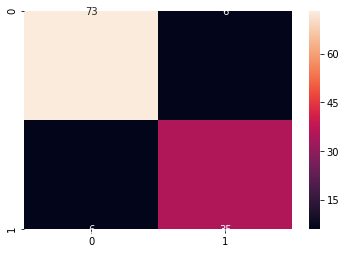

In [57]:
import seaborn as sns
sns.heatmap(cMatrix, annot=True)

### How does the score of the classifier change as you change the number of estimators? 

In [63]:
print("Classifier Score for 10 estimators: ",rfc.score(testX, testY))

rfc = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
rfc.fit(trainX, trainY)

print("Classifier Score for 15 estimators: ",rfc.score(testX, testY))

rfc = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
rfc.fit(trainX, trainY)

print("Classifier Score for 20 estimators: ",rfc.score(testX, testY))

rfc = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
rfc.fit(trainX, trainY)

print("Classifier Score for 25 estimators: ",rfc.score(testX, testY))

Classifier Score for 10 estimators:  0.9166666666666666
Classifier Score for 15 estimators:  0.9083333333333333
Classifier Score for 20 estimators:  0.9166666666666666
Classifier Score for 25 estimators:  0.925


Increasing the number of estimators Increases the classifier score